# Setup

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training = pd.read_csv('playground-series-s5e12/train.csv', index_col='id')
testing = pd.read_csv('playground-series-s5e12/test.csv', index_col='id')

training.head(5)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


# EDA

In [3]:
training.shape

(700000, 25)

In [4]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   alcohol_consumption_per_week        700000 non-null  int64  
 2   physical_activity_minutes_per_week  700000 non-null  int64  
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  int64  
 9   diastolic_bp                        700000 non-null  int64  
 10  heart_rate                          700000 non-null  int64  
 11  cholesterol_total              

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,...,700000,700000,700000,700000,700000,700000,700000.000000,700000.000000,700000.000000,700000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,5,4,5,3,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,White,Highschool,Middle,Never,Employed,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,363237,386153,344145,290557,494448,516170,NaN,NaN,NaN,NaN
mean,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,...,NaN,NaN,NaN,NaN,NaN,NaN,0.149401,0.181990,0.030324,0.623296
std,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,...,NaN,NaN,NaN,NaN,NaN,NaN,0.356484,0.385837,0.171478,0.484560
min,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000


In [5]:
def get_vars(df, exclude_cols=None):
    """
    Identify variable types based on dtype + unique counts.

    Returns:
        {
            "numerical_vars": ...,
            "categorical_vars": ...,
            "continuous_vars": ...,
            "discrete_vars": ...,
            "binary_vars": ...,
            "true_numerical_vars": ...,
            "true_categorical_vars": ...,
            "all_vars": ...
        }
    """
    if exclude_cols is None:
        exclude_cols = []

    # --------------------
    # Base variable groups
    # --------------------
    numerical_vars = df.select_dtypes(include=["number"]).columns.tolist()
    categorical_vars = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # Remove excluded columns from each list
    numerical_vars = [c for c in numerical_vars if c not in exclude_cols]
    categorical_vars = [c for c in categorical_vars if c not in exclude_cols]

    # --------------------
    # Continuous vs Discrete
    # --------------------
    continuous_vars = []
    discrete_vars = []

    n_rows = len(df)

    for col in numerical_vars:
        n_unique = df[col].nunique(dropna=True)

        if (n_unique <= 10) or (df[col].dtype.kind in "iu" and n_unique / n_rows < 0.01):
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)

    # --------------------
    # Binary detection (among discrete vars)
    # --------------------
    binary_vars = []
    nonbinary_discrete = discrete_vars.copy()

    for col in nonbinary_discrete.copy():
        unique_vals = df[col].dropna().unique()
        n_unique = len(unique_vals)

        if n_unique == 2:
            binary_vars.append(col)
            discrete_vars.remove(col)

    # --------------------
    # Final "true" groups
    # --------------------
    true_numerical_vars = continuous_vars + discrete_vars
    true_categorical_vars = categorical_vars + binary_vars
    all_vars = true_numerical_vars + true_categorical_vars

    # --------------------
    # Return everything
    # --------------------
    return {
        "numerical_vars": numerical_vars,
        "categorical_vars": categorical_vars,
        "continuous_vars": continuous_vars,
        "discrete_vars": discrete_vars,
        "binary_vars": binary_vars,
        "true_numerical_vars": true_numerical_vars,
        "true_categorical_vars": true_categorical_vars,
        "all_vars": all_vars
    }

vars_dict = get_vars(training, ["diagnosed_diabetes"])

# print("Numerical:", vars_dict["numerical_vars"])
# print("Categorical:", vars_dict["categorical_vars"])
# print("Continuous:", vars_dict["continuous_vars"])
# print("Discrete:", vars_dict["discrete_vars"])
# print("Binary:", vars_dict["binary_vars"])
# print("True numerical:", vars_dict["true_numerical_vars"])
# print("True categorical:", vars_dict["true_categorical_vars"])
# print("All vars:", vars_dict["all_vars"])

## Outlier Checking

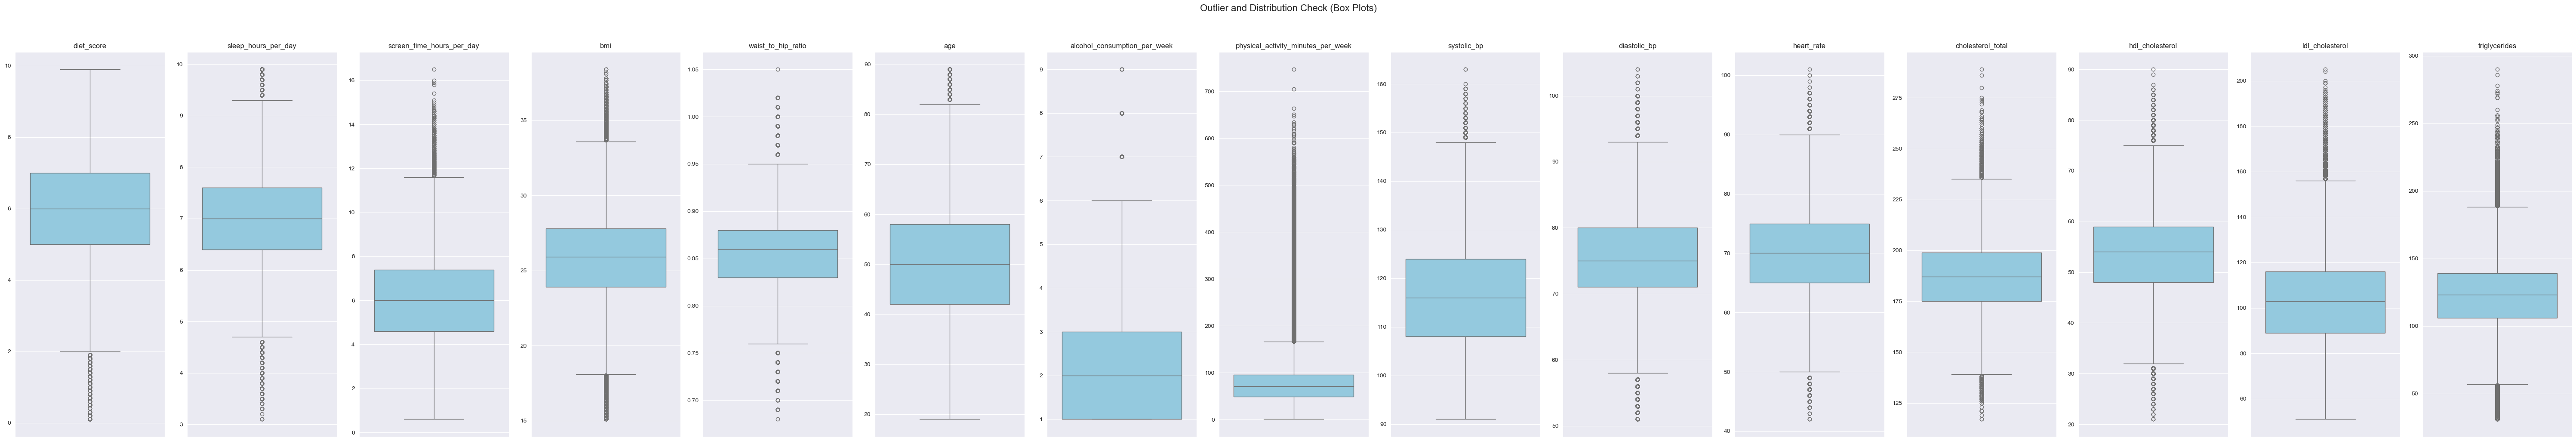

In [6]:
ncols = len(vars_dict["true_numerical_vars"])

fig, axes = plt.subplots(1, ncols, figsize=(4 * ncols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(vars_dict["true_numerical_vars"]):
    sns.boxplot(y=training[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [7]:
from sklearn.model_selection import train_test_split

SEED = 42

X = training[vars_dict["all_vars"]]
y = training["diagnosed_diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts())

(490000, 24) (210000, 24)
diagnosed_diabetes
1.0    305131
0.0    184869
Name: count, dtype: int64


Training data is skewed. So I will use bootstrapping on my training data.

In [8]:
from sklearn.utils import resample

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.diagnosed_diabetes == 1]
minority = train_data[train_data.diagnosed_diabetes == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=SEED)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=SEED).reset_index(drop=True)

X_train = train_data_balanced.drop('diagnosed_diabetes', axis=1)
y_train = train_data_balanced['diagnosed_diabetes']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Balanced Train Counts:
diagnosed_diabetes
1.0    305131
0.0    305131
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[vars_dict["true_numerical_vars"]])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[vars_dict["true_numerical_vars"]])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_test.index
)

In [10]:
X_train = pd.get_dummies(X_train[vars_dict["true_categorical_vars"]], drop_first=True)
X_test = pd.get_dummies(X_test[vars_dict["true_categorical_vars"]], drop_first=True)

X_train_encoded, X_test_encoded = X_train.align(
    X_test,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

X_train = pd.concat([X_train_scaled_df, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_encoded], axis=1)

print(f"Final Feature Shape Train: {X_train.shape}, Test: {X_test.shape}")

Encoded Shape Train: (610262, 21), Test: (210000, 21)
Final Feature Shape Train: (610262, 36), Test: (210000, 36)


In [11]:
X_train.head()

,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,systolic_bp,diastolic_bp,...,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,1.785588,0.552806,0.245210,-0.627645,0.317228,0.184502,-1.021358,-0.572585,1.823945,-1.374273,...,True,False,False,True,False,True,False,False,False,False
1,1.103056,1.108131,0.393594,0.001493,0.317228,0.270440,-1.021358,-0.967028,0.640708,-0.494817,...,False,False,False,True,False,True,False,False,False,False
2,0.693537,0.330676,-0.249406,0.980154,0.317228,-2.393653,-0.066504,0.047253,-1.179657,-1.960578,...,False,False,False,True,False,False,False,False,False,False
3,0.079259,-0.113584,1.283903,-0.208219,-0.472620,-0.331129,-0.066504,0.141168,-2.089840,0.238064,...,False,False,False,True,False,False,True,False,False,False
4,-0.057248,-0.779973,-0.101021,-0.452884,1.370358,-1.104576,-1.021358,-0.666500,-0.451511,-1.960578,...,False,False,True,False,False,False,True,False,False,False


# Evaluation Function

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph, trained):
    if not trained:
        model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

# Logistic Regression Model

--- Logistic Regression ---
Train Accuracy: 0.6378 | Train AUC: 0.6961
Test  Accuracy: 0.6285 | Test  AUC: 0.6953
✅ Model seems balanced
------------------------------


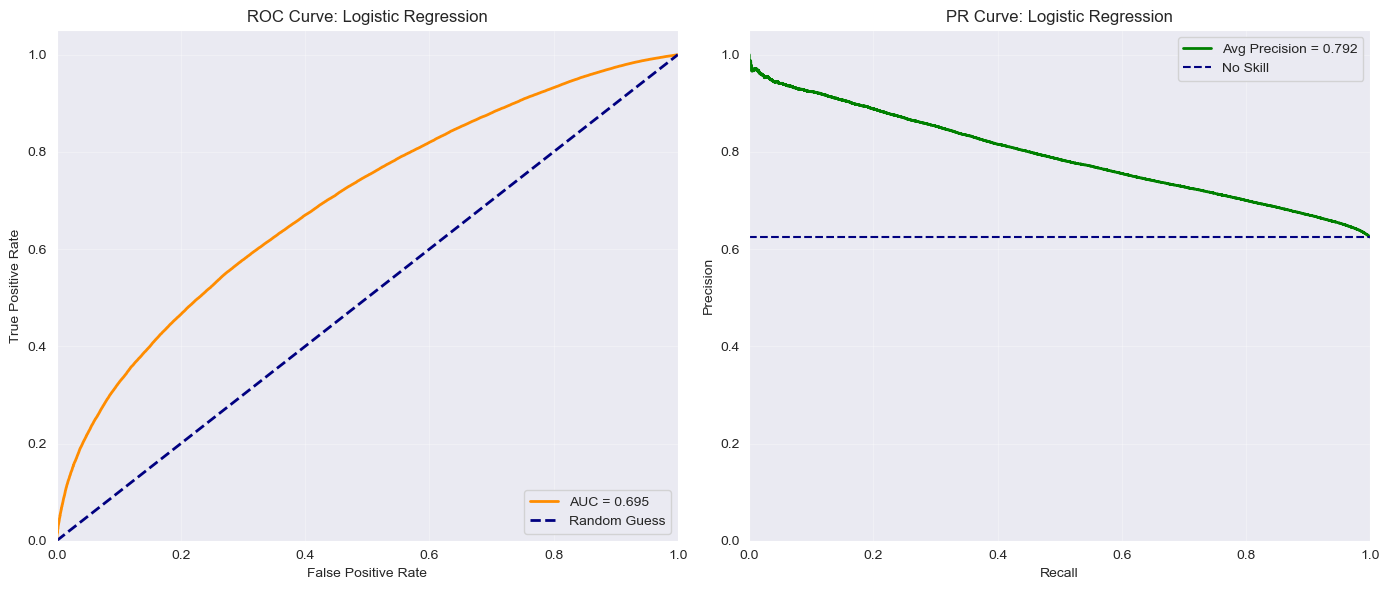

In [13]:
from sklearn.linear_model import LogisticRegression

results = []

lr = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr, X_train, y_train, X_test, y_test, "Logistic Regression", True, False)
)

# Gradient Boosting Classifier Model

--- Gradient Boosting (Tuned) ---
Train Accuracy: 0.6606 | Train AUC: 0.7243
Test  Accuracy: 0.6422 | Test  AUC: 0.7122
✅ Model seems balanced
------------------------------


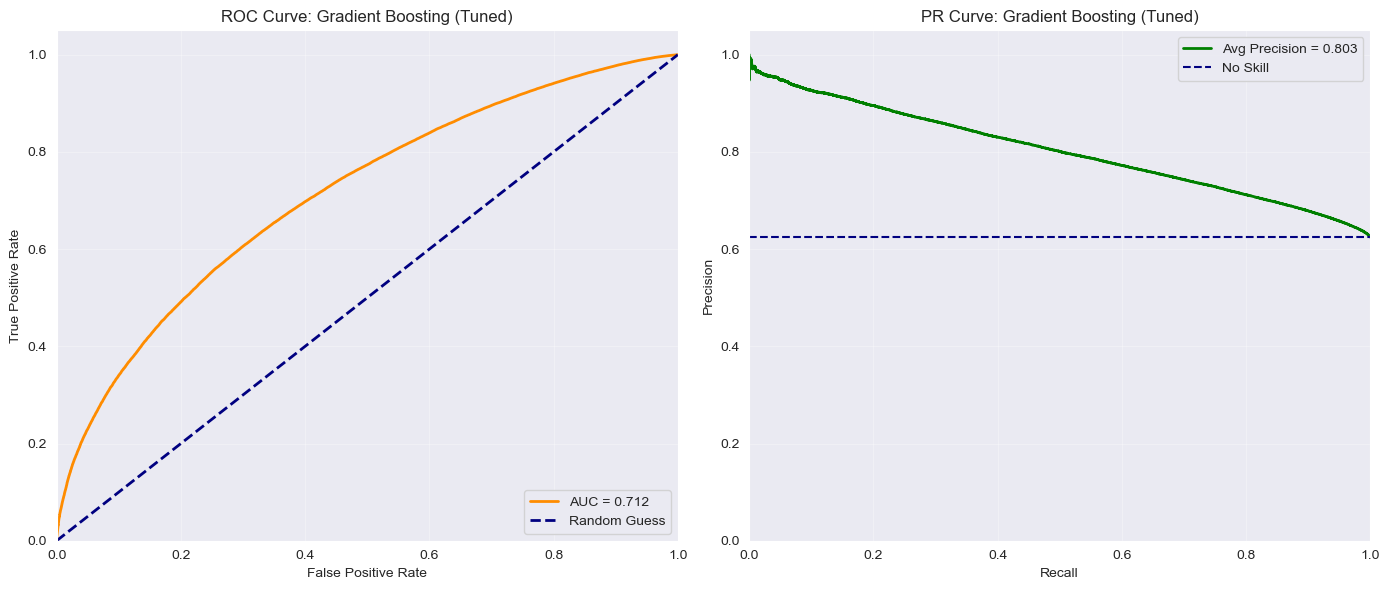

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# found with this code
# gb_hyper = GradientBoostingClassifier(random_state=SEED)
# param_distributions_gb = {
#     'n_estimators': randint(low=50, high=500),
#     'learning_rate': loguniform(0.001, 0.2),
#     'max_depth': randint(3, 8)
# }
#
# N_ITERATIONS = 5
#
# random_search_gb = RandomizedSearchCV(
#     estimator=gb_hyper,
#     param_distributions=param_distributions_gb,
#     n_iter=N_ITERATIONS,
#     cv=3,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=-1,
#     random_state=SEED
# )

best_params = {
    'learning_rate': np.float64(0.0483437145318464),
    'max_depth': 7,
    'n_estimators': 70
}

tuned_gb = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

results.append(
    evaluate_and_graph(tuned_gb, X_train, y_train, X_test, y_test, "Gradient Boosting (Tuned)", True, False)
)

# XGBoost

--- XGBoost ---
Train Accuracy: 0.6597 | Train AUC: 0.7228
Test  Accuracy: 0.6416 | Test  AUC: 0.7118
✅ Model seems balanced
------------------------------


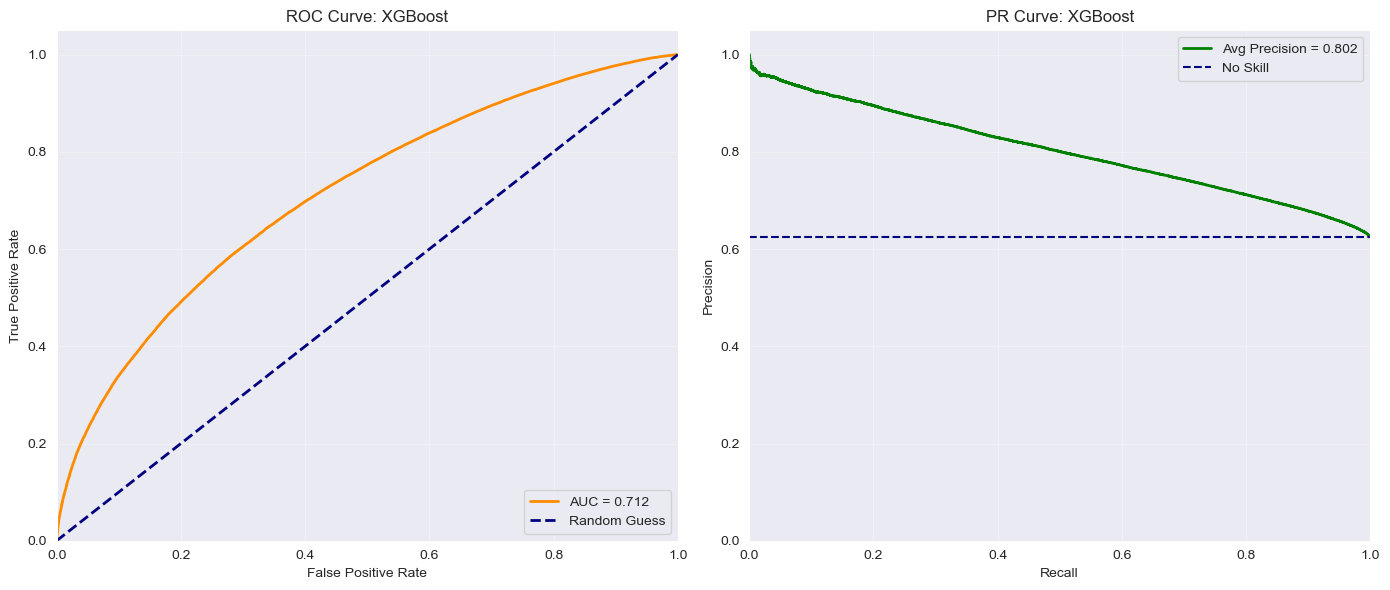

In [15]:
from xgboost import XGBClassifier

xgb_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "max_depth": int(best_params["max_depth"]),
    "n_estimators": int(best_params["n_estimators"]),
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "reg_lambda": 1.0,
    "random_state": SEED,
    "eval_metric": "logloss",
    "tree_method": "hist",
}

xgb = XGBClassifier(**xgb_params)

results.append(
    evaluate_and_graph(xgb, X_train, y_train, X_test, y_test, "XGBoost", True, False)
)

/opt/homebrew/anaconda3/envs/kaggle/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-12-21 11:59:00,250] A new study created in memory with name: no-name-c999d4c9-8bdc-4700-a91d-e735a62adebc
[I 2025-12-21 12:00:30,599] Trial 0 finished with value: 0.7375315677822666 and parameters: {'n_estimators': 2591, 'max_depth': 6, 'learning_rate': 0.009205773050947075, 'subsample': 0.822971543945123, 'colsample_bytree': 0.7496318780360726, 'min_child_weight': 0.06484053806723605, 'gamma': 4.118133800866282e-07, 'reg_alpha': 7.016004986489066e-08, 'reg_lambda': 0.04848317102765932}. Best is trial 0 with value: 0.7375315677822666.
[I 2025-12-21 12:02:44,127] Trial 1 finished with value: 0.7346970398624391 and parameters: {'n_estimators': 4988, 'max_depth': 4, 'learning_rate': 0.015264413653002741, 'subsample'

Best AUC: 0.8233818806944875
Best params: {'n_estimators': 3967, 'max_depth': 6, 'learning_rate': 0.1402139224396247, 'subsample': 0.7514755125431164, 'colsample_bytree': 0.6273711343750235, 'min_child_weight': 1.035335506930416, 'gamma': 2.3778411952945145e-08, 'reg_alpha': 8.79380957085049e-07, 'reg_lambda': 0.20551258722850532}
--- XGBoost (Optuna) ---
Train Accuracy: 0.8674 | Train AUC: 0.9445
Test  Accuracy: 0.6575 | Test  AUC: 0.6981
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


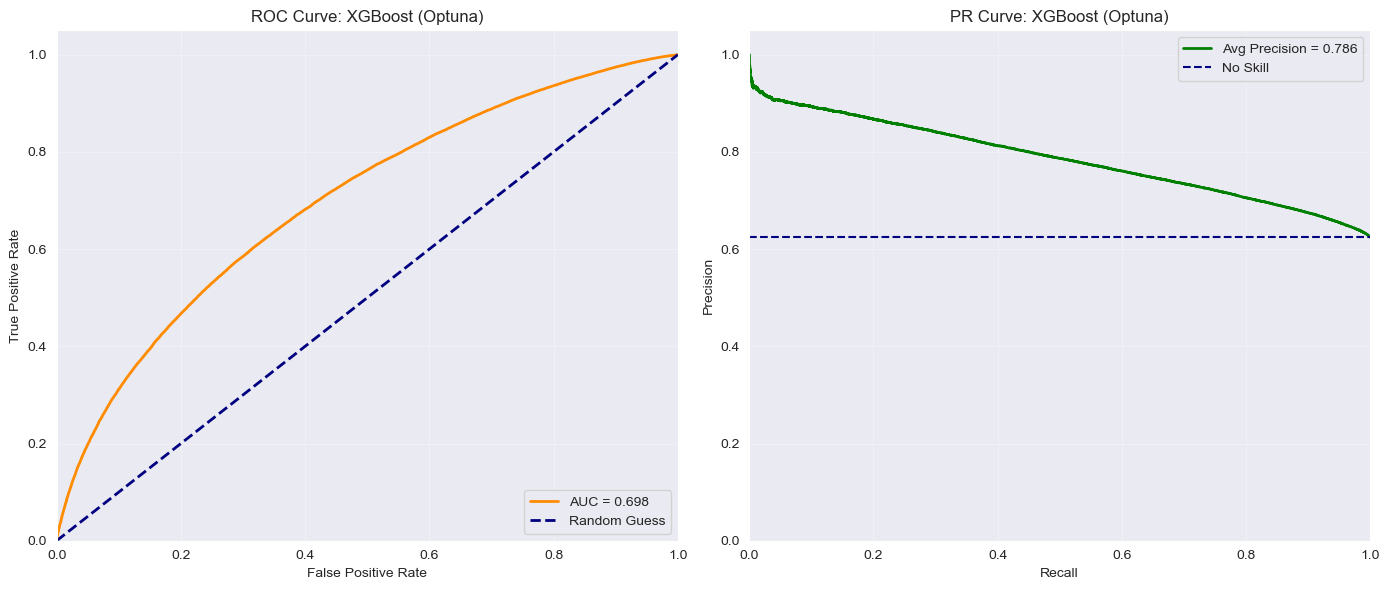

In [16]:
import optuna
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

def objective_xgboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 5000),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_float("min_child_weight", 1e-2, 30.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 10.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 50.0, log=True),
        "random_state": SEED,
        "eval_metric": "logloss",
        "tree_method": "hist",
    }

    aucs = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_va = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = XGBClassifier(**params, early_stopping_rounds=50)
        model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)

        p = model.predict_proba(X_va)[:, 1]
        aucs.append(roc_auc_score(y_va, p))

    return float(np.mean(aucs))

study = optuna.create_study(direction="maximize")
study.optimize(objective_xgboost, n_trials=10)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)

best_xgb = XGBClassifier(
    **study.best_params,
    random_state=SEED,
    eval_metric="logloss",
    tree_method="hist"
)

results.append(
    evaluate_and_graph(best_xgb, X_train, y_train, X_test, y_test, "XGBoost (Optuna)", True, False)
)

# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM ---
Train Accuracy: 0.6574 | Train AUC: 0.7195
Test  Accuracy: 0.6417 | Test  AUC: 0.7121
✅ Model seems balanced
------------------------------


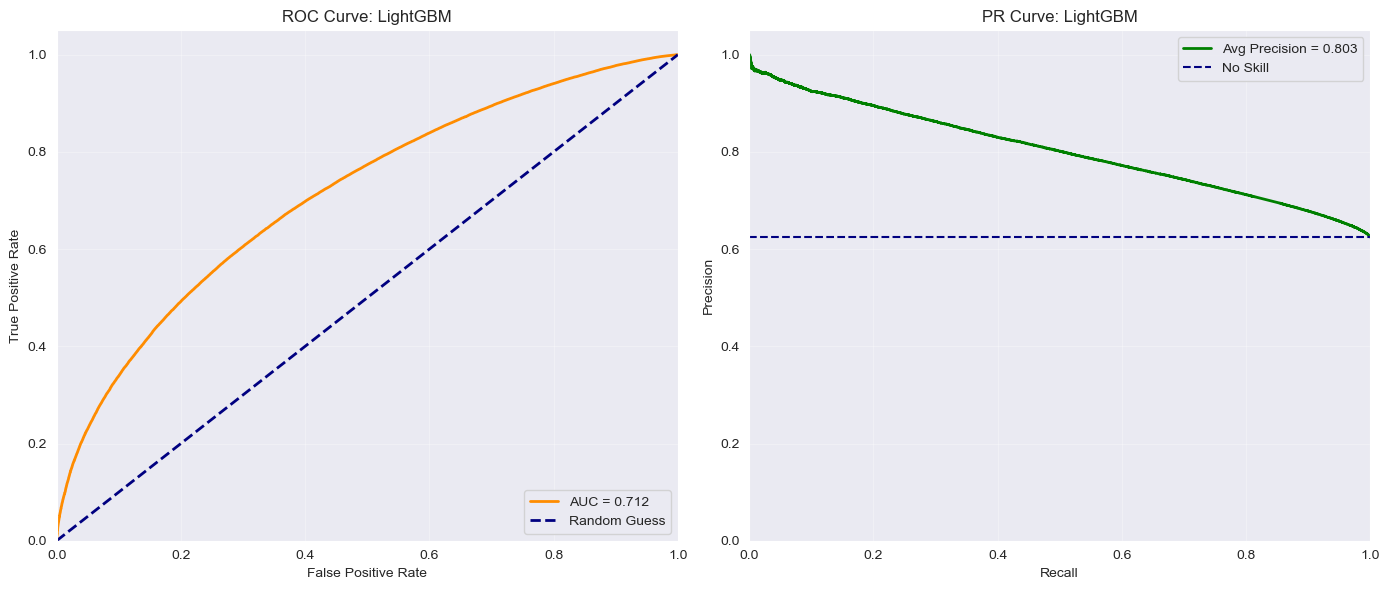

In [17]:
from lightgbm import LGBMClassifier

lgbm_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "max_depth": int(best_params["max_depth"]),
    "n_estimators": int(best_params["n_estimators"]),
    "num_leaves": 63,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "random_state": SEED,
}

lgbm = LGBMClassifier(**lgbm_params)

results.append(
    evaluate_and_graph(lgbm, X_train, y_train, X_test, y_test, "LightGBM", True, False)
)

[I 2025-12-21 12:18:04,407] A new study created in memory with name: no-name-084ecab3-7a2f-4fce-ba73-56ac717816fc


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4142]	valid_0's auc: 0.744412	valid_0's binary_logloss: 0.593441
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4143]	valid_0's auc: 0.743051	valid_0's binary_logloss: 0.594656
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4142]	valid_0's auc: 0.743127	valid_0's binary_logloss: 0.594816
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4143]	valid_0's auc: 0.742811	valid_0's binary_logloss: 0.59484
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4143]	valid_0's auc: 0.744129	valid_0's binary_logloss: 0.593938


[I 2025-12-21 12:21:24,577] Trial 0 finished with value: 0.7435058993010666 and parameters: {'n_estimators': 4143, 'learning_rate': 0.052108285255598956, 'max_depth': 5, 'num_leaves': 69, 'min_child_samples': 1541, 'subsample': 0.7995204178459784, 'colsample_bytree': 0.8587732025789151, 'reg_alpha': 9.943746891460077e-05, 'reg_lambda': 0.001270428891812365}. Best is trial 0 with value: 0.7435058993010666.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.693671	valid_0's binary_logloss: 0.690265
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2745]	valid_0's auc: 0.712035	valid_0's binary_logloss: 0.618992
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.691361	valid_0's binary_logloss: 0.689748
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.693135	valid_0's binary_logloss: 0.690553
Training until validation scores don't improve for 50 rounds


[I 2025-12-21 12:22:00,225] Trial 1 finished with value: 0.6969841730769194 and parameters: {'n_estimators': 2745, 'learning_rate': 0.002779279536898938, 'max_depth': 4, 'num_leaves': 212, 'min_child_samples': 1350, 'subsample': 0.668818910834284, 'colsample_bytree': 0.6176854859246887, 'reg_alpha': 0.0006606726330696013, 'reg_lambda': 0.012879009780512337}. Best is trial 0 with value: 0.7435058993010666.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.694718	valid_0's binary_logloss: 0.69025
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2358]	valid_0's auc: 0.727885	valid_0's binary_logloss: 0.607305
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2358]	valid_0's auc: 0.725907	valid_0's binary_logloss: 0.608543
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2358]	valid_0's auc: 0.726213	valid_0's binary_logloss: 0.60856
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2358]	valid_0's auc: 0.726727	valid_0's binary_logloss: 0.607798
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2358]	valid_0's auc: 0.728525	valid_0's binary_logloss: 0.606641


[I 2025-12-21 12:23:24,972] Trial 2 finished with value: 0.7270514303550633 and parameters: {'n_estimators': 2358, 'learning_rate': 0.04731814628138478, 'max_depth': 2, 'num_leaves': 223, 'min_child_samples': 1309, 'subsample': 0.8641688023392488, 'colsample_bytree': 0.9536919212541896, 'reg_alpha': 1.5147813214005852, 'reg_lambda': 4.527235941711591}. Best is trial 0 with value: 0.7435058993010666.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1738]	valid_0's auc: 0.723463	valid_0's binary_logloss: 0.610616
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1738]	valid_0's auc: 0.721147	valid_0's binary_logloss: 0.612001
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1738]	valid_0's auc: 0.721909	valid_0's binary_logloss: 0.611757
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1738]	valid_0's auc: 0.722863	valid_0's binary_logloss: 0.610753
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1737]	valid_0's auc: 0.724803	valid_0's binary_logloss: 0.609358


[I 2025-12-21 12:24:27,723] Trial 3 finished with value: 0.7228371198784245 and parameters: {'n_estimators': 1738, 'learning_rate': 0.03837359502304003, 'max_depth': 2, 'num_leaves': 220, 'min_child_samples': 174, 'subsample': 0.9575743180272982, 'colsample_bytree': 0.8074278168535769, 'reg_alpha': 0.0007870792603715287, 'reg_lambda': 16.403019304738162}. Best is trial 0 with value: 0.7435058993010666.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2256]	valid_0's auc: 0.711883	valid_0's binary_logloss: 0.618584
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2256]	valid_0's auc: 0.709364	valid_0's binary_logloss: 0.620048
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2256]	valid_0's auc: 0.711156	valid_0's binary_logloss: 0.619207
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2256]	valid_0's auc: 0.711286	valid_0's binary_logloss: 0.618887
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2256]	valid_0's auc: 0.712686	valid_0's binary_logloss: 0.617855


[I 2025-12-21 12:26:23,170] Trial 4 finished with value: 0.711275026415876 and parameters: {'n_estimators': 2256, 'learning_rate': 0.003733353041060967, 'max_depth': 4, 'num_leaves': 105, 'min_child_samples': 1517, 'subsample': 0.861753857315686, 'colsample_bytree': 0.9538200457845134, 'reg_alpha': 3.555224655346536, 'reg_lambda': 0.3394966779856438}. Best is trial 0 with value: 0.7435058993010666.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.66793	valid_0's binary_logloss: 0.692158
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[241]	valid_0's auc: 0.674168	valid_0's binary_logloss: 0.677439
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.666298	valid_0's binary_logloss: 0.692177
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.665588	valid_0's binary_logloss: 0.692172
Training until validation scores don't improve for 50 rounds


[I 2025-12-21 12:26:28,706] Trial 5 finished with value: 0.6699519733373647 and parameters: {'n_estimators': 3936, 'learning_rate': 0.0011468203355541348, 'max_depth': 2, 'num_leaves': 192, 'min_child_samples': 783, 'subsample': 0.9758727451186429, 'colsample_bytree': 0.9222037759889673, 'reg_alpha': 5.758126900848579e-08, 'reg_lambda': 36.16953340597607}. Best is trial 0 with value: 0.7435058993010666.


Early stopping, best iteration is:
[202]	valid_0's auc: 0.675777	valid_0's binary_logloss: 0.679238
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[283]	valid_0's auc: 0.671929	valid_0's binary_logloss: 0.672885
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.666439	valid_0's binary_logloss: 0.690028
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.666313	valid_0's binary_logloss: 0.688601
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.665588	valid_0's binary_logloss: 0.690027
Training until validation scores don't improve for 50 rounds


[I 2025-12-21 12:26:34,107] Trial 6 finished with value: 0.6676704615993106 and parameters: {'n_estimators': 462, 'learning_rate': 0.0012934610964120677, 'max_depth': 2, 'num_leaves': 219, 'min_child_samples': 1842, 'subsample': 0.9688061087590863, 'colsample_bytree': 0.9855317547549253, 'reg_alpha': 0.07625114184898552, 'reg_lambda': 0.5846519619086926}. Best is trial 0 with value: 0.7435058993010666.


Early stopping, best iteration is:
[34]	valid_0's auc: 0.668085	valid_0's binary_logloss: 0.689974
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1750]	valid_0's auc: 0.731241	valid_0's binary_logloss: 0.604597
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1750]	valid_0's auc: 0.729031	valid_0's binary_logloss: 0.605984
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1750]	valid_0's auc: 0.729533	valid_0's binary_logloss: 0.605974
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1750]	valid_0's auc: 0.729837	valid_0's binary_logloss: 0.60532
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1750]	valid_0's auc: 0.731971	valid_0's binary_logloss: 0.604068


[I 2025-12-21 12:27:44,015] Trial 7 finished with value: 0.7303225185627996 and parameters: {'n_estimators': 1750, 'learning_rate': 0.04757594637805749, 'max_depth': 3, 'num_leaves': 251, 'min_child_samples': 553, 'subsample': 0.7102762420014929, 'colsample_bytree': 0.7921696816272299, 'reg_alpha': 0.00022906780684451555, 'reg_lambda': 0.5621080225484686}. Best is trial 0 with value: 0.7435058993010666.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4521]	valid_0's auc: 0.735602	valid_0's binary_logloss: 0.600905
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4521]	valid_0's auc: 0.73474	valid_0's binary_logloss: 0.601494
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4521]	valid_0's auc: 0.734732	valid_0's binary_logloss: 0.60179
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4521]	valid_0's auc: 0.734479	valid_0's binary_logloss: 0.601538
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4520]	valid_0's auc: 0.737177	valid_0's binary_logloss: 0.599683


[I 2025-12-21 12:33:29,742] Trial 8 finished with value: 0.735346004182 and parameters: {'n_estimators': 4521, 'learning_rate': 0.005855742029471498, 'max_depth': 6, 'num_leaves': 238, 'min_child_samples': 201, 'subsample': 0.8580151288961414, 'colsample_bytree': 0.7363256677463704, 'reg_alpha': 2.055421232494816e-05, 'reg_lambda': 0.3417288445116493}. Best is trial 0 with value: 0.7435058993010666.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3773]	valid_0's auc: 0.767479	valid_0's binary_logloss: 0.573868
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3772]	valid_0's auc: 0.76739	valid_0's binary_logloss: 0.573977
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3773]	valid_0's auc: 0.766602	valid_0's binary_logloss: 0.57478
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3772]	valid_0's auc: 0.76589	valid_0's binary_logloss: 0.575514
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3773]	valid_0's auc: 0.767852	valid_0's binary_logloss: 0.573446


[I 2025-12-21 12:37:08,923] Trial 9 finished with value: 0.7670427211996984 and parameters: {'n_estimators': 3773, 'learning_rate': 0.1598727121383366, 'max_depth': 5, 'num_leaves': 159, 'min_child_samples': 498, 'subsample': 0.7634476761586063, 'colsample_bytree': 0.6788788111914761, 'reg_alpha': 3.0555794758270564e-08, 'reg_lambda': 0.025575148393462154}. Best is trial 9 with value: 0.7670427211996984.


Best AUC: 0.7670427211996984
Best params: {'n_estimators': 3773, 'learning_rate': 0.1598727121383366, 'max_depth': 5, 'num_leaves': 159, 'min_child_samples': 498, 'subsample': 0.7634476761586063, 'colsample_bytree': 0.6788788111914761, 'reg_alpha': 3.0555794758270564e-08, 'reg_lambda': 0.025575148393462154}
--- LightGBM (Optuna) ---
Train Accuracy: 0.7534 | Train AUC: 0.8341
Test  Accuracy: 0.6580 | Test  AUC: 0.7165
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


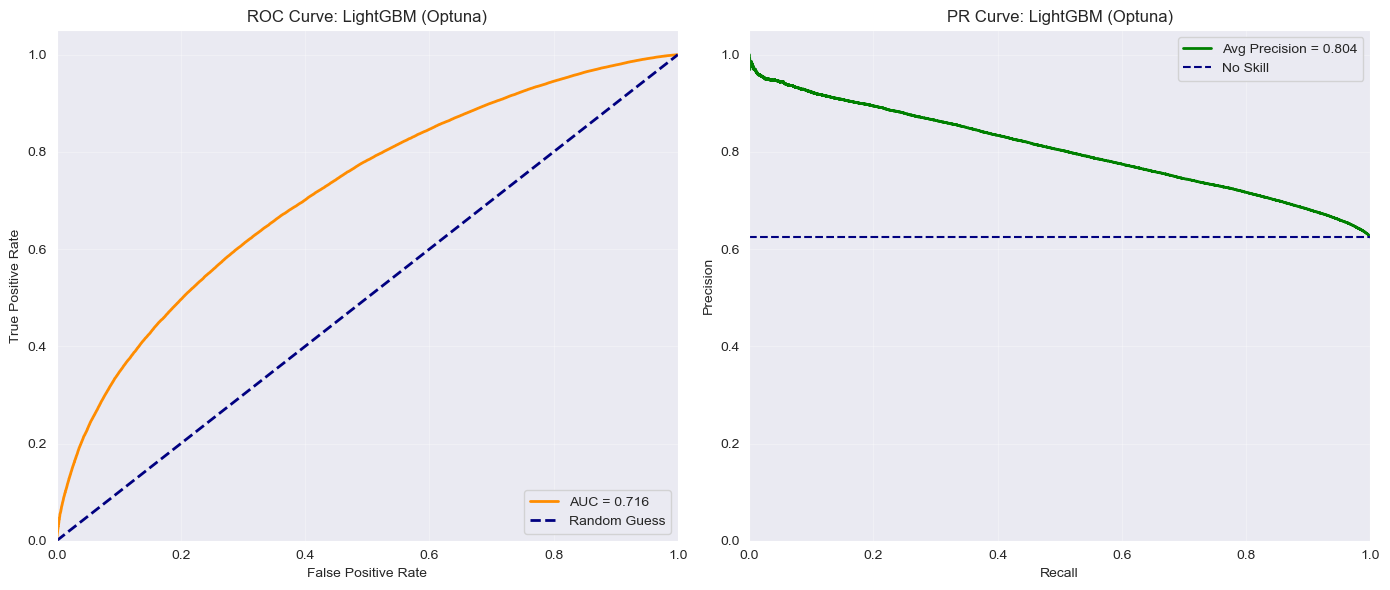

In [18]:
import lightgbm as lgb

def objective_lgm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 5000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "min_child_samples": trial.suggest_int("min_child_samples", 50, 2000),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 50.0, log=True),
        "random_state": SEED,
        "verbosity": -1,
        "n_jobs": -1
    }

    aucs = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_va = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = LGBMClassifier(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_va, y_va)],
            eval_metric="auc",
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        p = model.predict_proba(X_va)[:, 1]
        aucs.append(roc_auc_score(y_va, p))

    return float(np.mean(aucs))

study = optuna.create_study(direction="maximize")
study.optimize(objective_lgm, n_trials=10)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)

best_lgbm = LGBMClassifier(**study.best_params, random_state=SEED)

results.append(
    evaluate_and_graph(best_lgbm, X_train, y_train, X_test, y_test, "LightGBM (Optuna)", True, False)
)

# CatBoost

--- CatBoost ---
Train Accuracy: 0.6462 | Train AUC: 0.7059
Test  Accuracy: 0.6336 | Test  AUC: 0.7038
✅ Model seems balanced
------------------------------


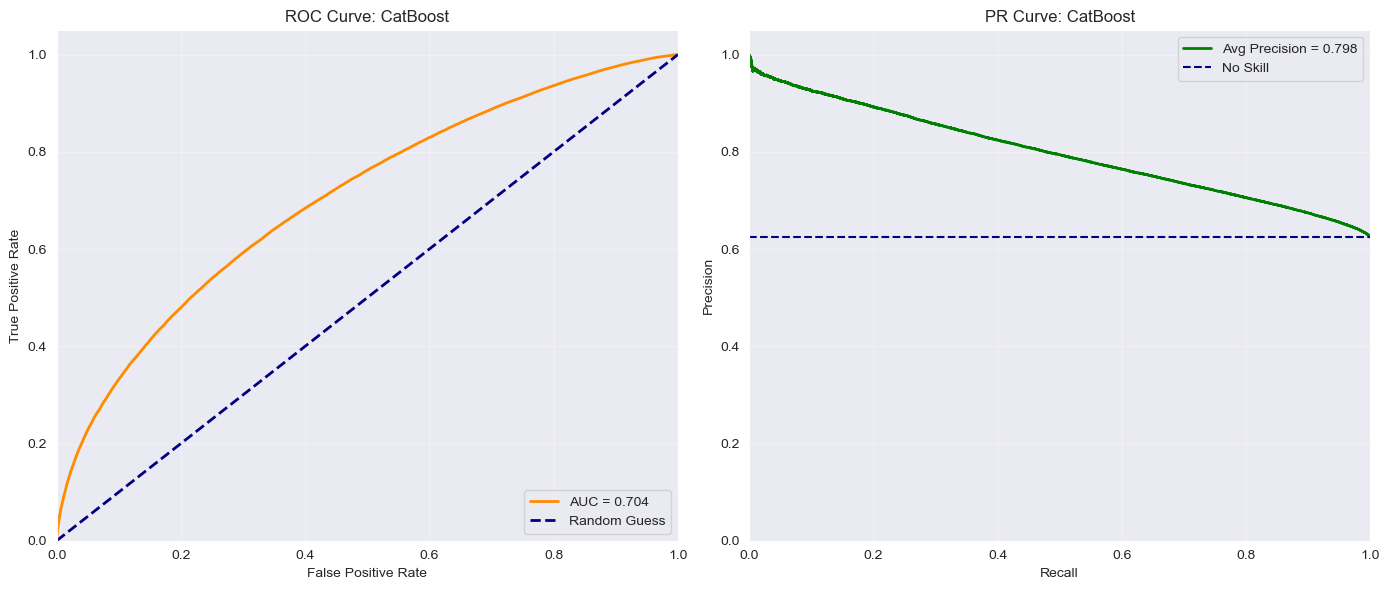

In [19]:
from catboost import CatBoostClassifier

cat_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "depth": int(best_params["max_depth"]),
    "iterations": int(best_params["n_estimators"]),
    "loss_function": "Logloss",
    "random_seed": SEED,
    "verbose": False,
}

cat = CatBoostClassifier(**cat_params)

results.append(
    evaluate_and_graph(cat, X_train, y_train, X_test, y_test, "CatBoost", True, False)
)


bestTest = 0.7148838454
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.7148838	best: 0.7148838 (0)	total: 55.6s	remaining: 8m 20s

bestTest = 0.7354983291
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.7354983	best: 0.7354983 (1)	total: 1m 54s	remaining: 7m 38s

bestTest = 0.7160866334
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.7160866	best: 0.7354983 (1)	total: 2m 52s	remaining: 6m 42s

bestTest = 0.7059411871
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.7059412	best: 0.7354983 (1)	total: 3m 31s	remaining: 

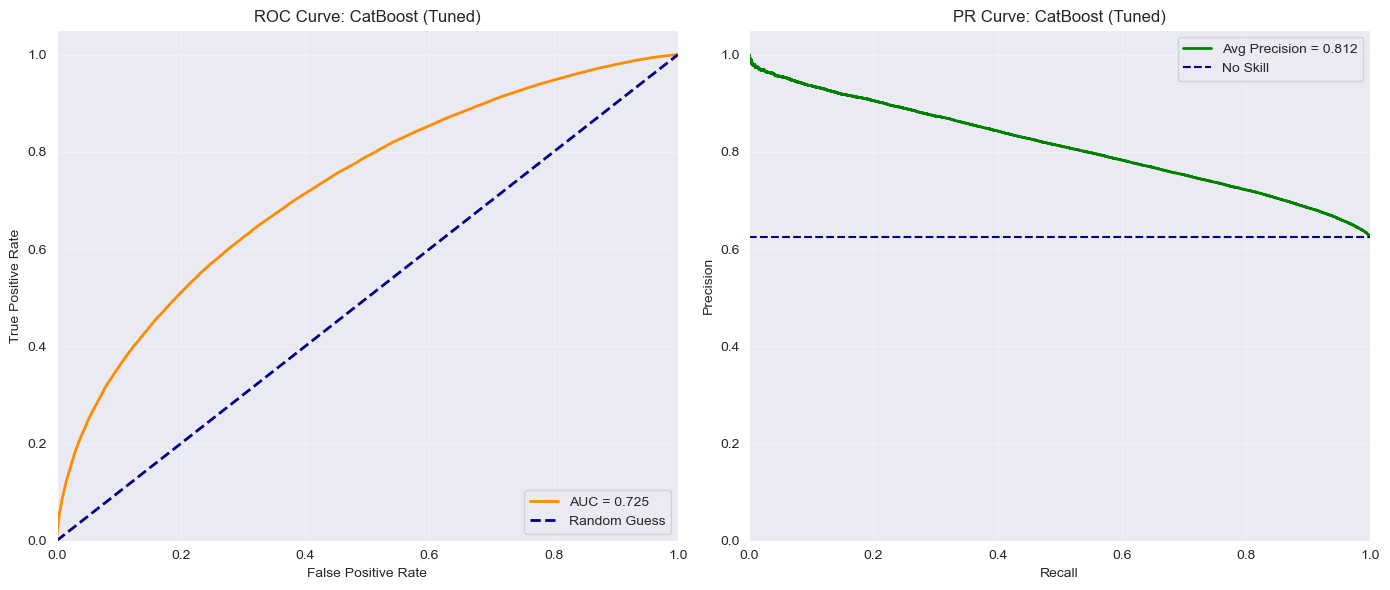

In [20]:
from catboost import CatBoostClassifier

param_grid = {
    "iterations": [2000],
    "depth": [2, 4, 6],
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1],
    "l2_leaf_reg": [3, 10, 30, 50],
    "subsample": [0.6, 1.0],
    "random_strength": [1, 5, 10],
    "bootstrap_type": ["MVS"],
}

cat = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=SEED,
    verbose=False,
    early_stopping_rounds=50,
    od_type="Iter"
)

search_results = cat.randomized_search(
    param_grid,
    X=X_train,
    y=y_train,
    cv=5,
    n_iter=10,
    plot=False
)

best_params = search_results["params"]

best_cat = CatBoostClassifier(
    **best_params,
    random_seed=SEED,
    verbose=False
)

results.append(
    evaluate_and_graph(best_cat, X_train, y_train, X_test, y_test, "CatBoost (Tuned)", True, False)
)

# Ensemble Stacking

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244105, number of negative: 244105
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244105, number of negative: 244104
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of 

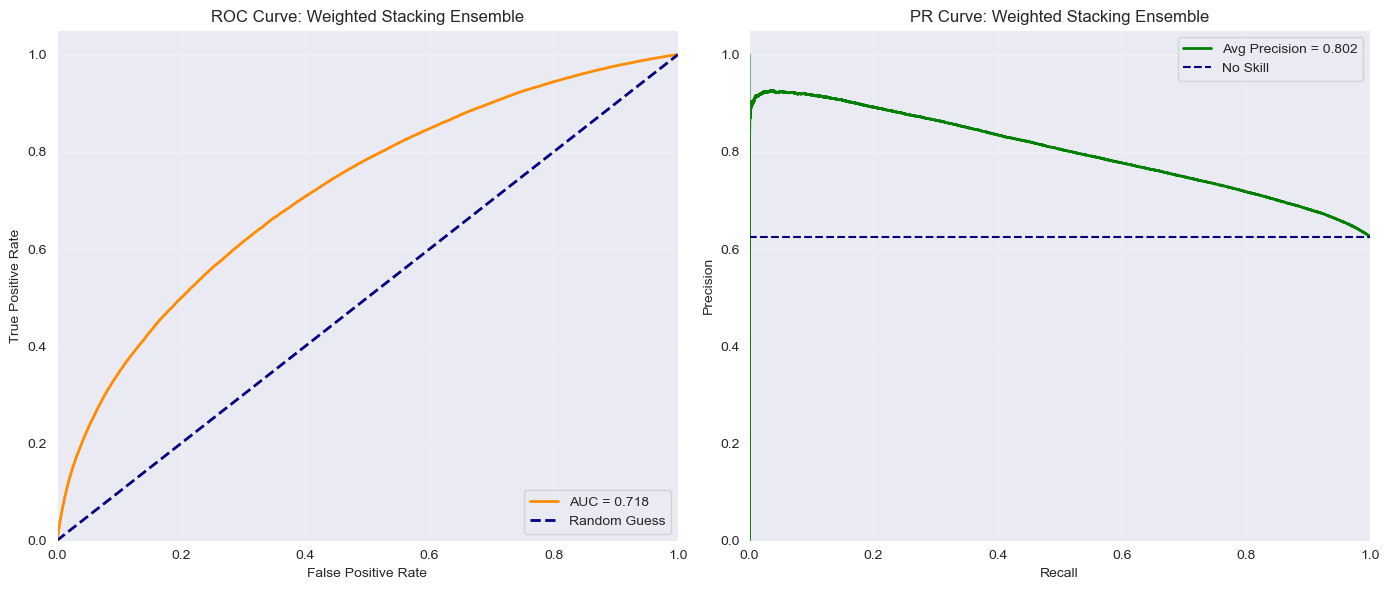

In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin, clone

weights_stack = {
    "gb_tuned": 2.0,
    "lgbm": 2.0,
    "xgb": 2.0,
    "cat": 1.0,
    "lr": 1.0
}

estimators_stack = [
    ("gb_tuned", tuned_gb),
    ("lgbm", lgbm),
    ("xgb", xgb),
    ("cat", cat),
    ("lr", lr),
]

class WeightedStackingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, final_estimator, weights, cv=5, n_jobs=-1, passthrough=False):
        self.estimators = estimators
        self.final_estimator = final_estimator
        self.weights = weights
        self.cv = cv
        self.n_jobs = n_jobs
        self.passthrough = passthrough

    def fit(self, X, y):
        self._stack = StackingClassifier(
            estimators=self.estimators,
            final_estimator=clone(self.final_estimator),
            stack_method="predict_proba",
            passthrough=self.passthrough,
            cv=self.cv,
            n_jobs=self.n_jobs
        )

        self._stack.fit(X, y)

        self.classes_ = getattr(self._stack, "classes_", np.unique(y))

        self._names = [name for name, _ in self.estimators]

        return self

    def _weighted_meta_features(self, X):
        meta = []
        for name, est in zip(self._names, self._stack.estimators_):
            proba = est.predict_proba(X)

            classes = getattr(est, "classes_", None)
            if classes is None:
                pos_idx = 1
            else:
                pos_idx = list(classes).index(1) if 1 in list(classes) else 1

            p1 = proba[:, pos_idx]
            meta.append(p1)

        meta = np.column_stack(meta)

        w = np.array([float(self.weights.get(n, 1.0)) for n in self._names], dtype=float)
        meta = meta * w

        return meta

    def predict_proba(self, X):
        meta = self._weighted_meta_features(X)

        if self.passthrough:
            # concatenate original features
            X_arr = X.to_numpy() if hasattr(X, "to_numpy") else np.asarray(X)
            meta = np.hstack([meta, X_arr])

        final = self._stack.final_estimator_

        return final.predict_proba(meta)

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]


from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

stack_weighted = WeightedStackingClassifier(
    estimators=estimators_stack,
    final_estimator=LogisticRegression(max_iter=3000),
    weights=weights_stack,
    cv=cv,
    n_jobs=-1,
    passthrough=False
)

results.append(
    evaluate_and_graph(stack_weighted, X_train, y_train, X_test, y_test, "Weighted Stacking Ensemble", True, False)
)

Fitting gb_tuned...
Fitting lgbm...
Fitting lgbm_tuned...
Fitting xgb...
Fitting xgb_tuned...
Fitting cat...
Fitting cat_tuned...
Fitting lr...
--- Weighted Blender Ensemble ---
Train Accuracy: 0.7551 | Train AUC: 0.8367
Test  Accuracy: 0.6609 | Test  AUC: 0.7237
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


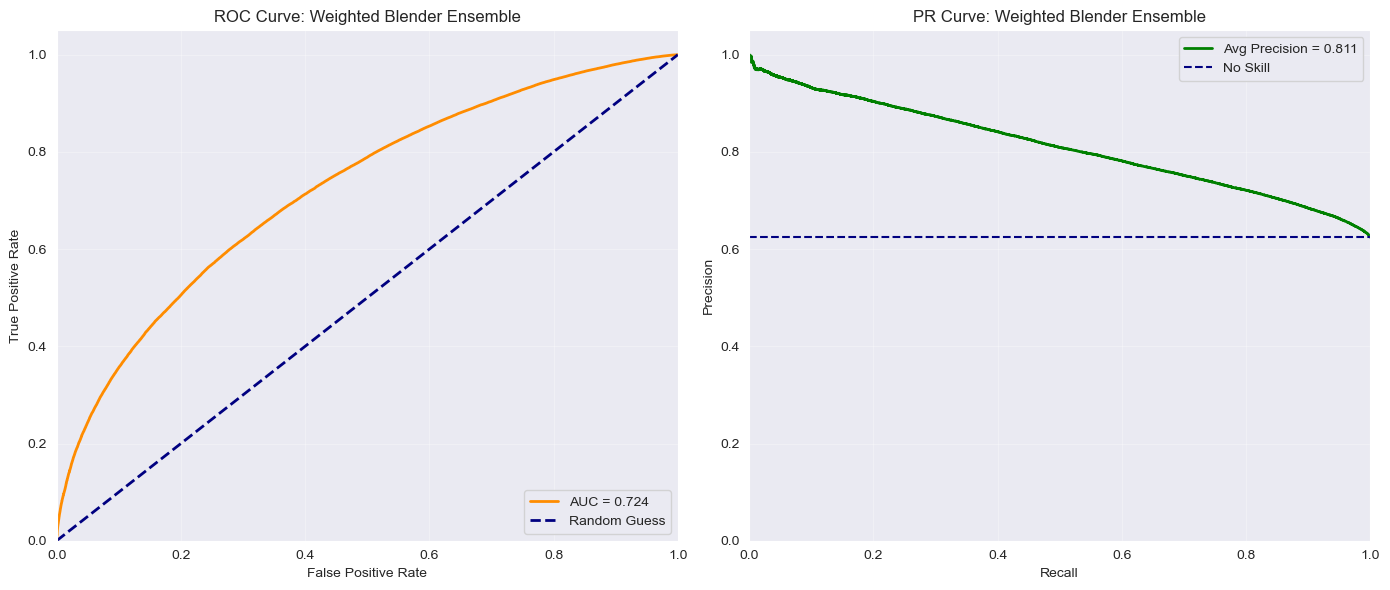

In [22]:
from sklearn.utils.validation import check_is_fitted

weights_blend = {
    "lgbm_tuned": 5.0,
    "cat_tuned": 3.0,
    "xgb_tuned": 2.0,
    "gb_tuned": 1.0,
    "lgbm": 1.0,
    "xgb": 1.0,
    "cat": 0.5,
    "lr": 0.5
}

estimators_blend = [
    ("gb_tuned", tuned_gb),
    ("lgbm", lgbm),
    ("lgbm_tuned", best_lgbm),
    ("xgb", xgb),
    ("xgb_tuned", best_xgb),
    ("cat", cat),
    ("cat_tuned", best_cat),
    ("lr", lr),
]

class WeightedBlender(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, weights=None):
        self.estimators = estimators
        self.weights = weights

    def fit(self, X, y):
        self.fitted_estimators_ = []
        self.names_ = []
        for name, est in self.estimators:
            print(f"Fitting {name}...")
            fitted_est = clone(est).fit(X, y)
            self.fitted_estimators_.append(fitted_est)
            self.names_.append(name)

        self.classes_ = self.fitted_estimators_[0].classes_
        return self

    def predict_proba(self, X):
        check_is_fitted(self)

        all_probas = []

        total_weight = sum(self.weights.get(name, 1.0) for name in self.names_)

        for name, est in zip(self.names_, self.fitted_estimators_):
            weight = self.weights.get(name, 1.0)
            all_probas.append(est.predict_proba(X) * (weight / total_weight))

        return np.sum(all_probas, axis=0)

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

blender = WeightedBlender(estimators=estimators_blend, weights=weights_blend)

results.append(
    evaluate_and_graph(blender, X_train, y_train, X_test, y_test, "Weighted Blender Ensemble", True, False)
)

## Referenced Cat Boost Code

I looked at this notebook and made a couple of changes to improve the predictions

https://www.kaggle.com/code/krrishkumarkk/0-700-catboost-kfold-feature-best-output


Training seed: 42
Fold 1 AUC: 0.8010
Fold 2 AUC: 0.8010
Fold 3 AUC: 0.8007
Fold 4 AUC: 0.8006
Fold 5 AUC: 0.8026
Seed 42 mean AUC: 0.80118

Training seed: 52
Fold 1 AUC: 0.8026
Fold 2 AUC: 0.8012
Fold 3 AUC: 0.8003
Fold 4 AUC: 0.8031
Fold 5 AUC: 0.7992
Seed 52 mean AUC: 0.80127

Training seed: 62
Fold 1 AUC: 0.8019
Fold 2 AUC: 0.8024
Fold 3 AUC: 0.8006
Fold 4 AUC: 0.8015
Fold 5 AUC: 0.7995
Seed 62 mean AUC: 0.80118
--- Referenced CatBoost Ensemble ---
Train Accuracy: 0.8115 | Train AUC: 0.8952
Test  Accuracy: 0.6651 | Test  AUC: 0.7202
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


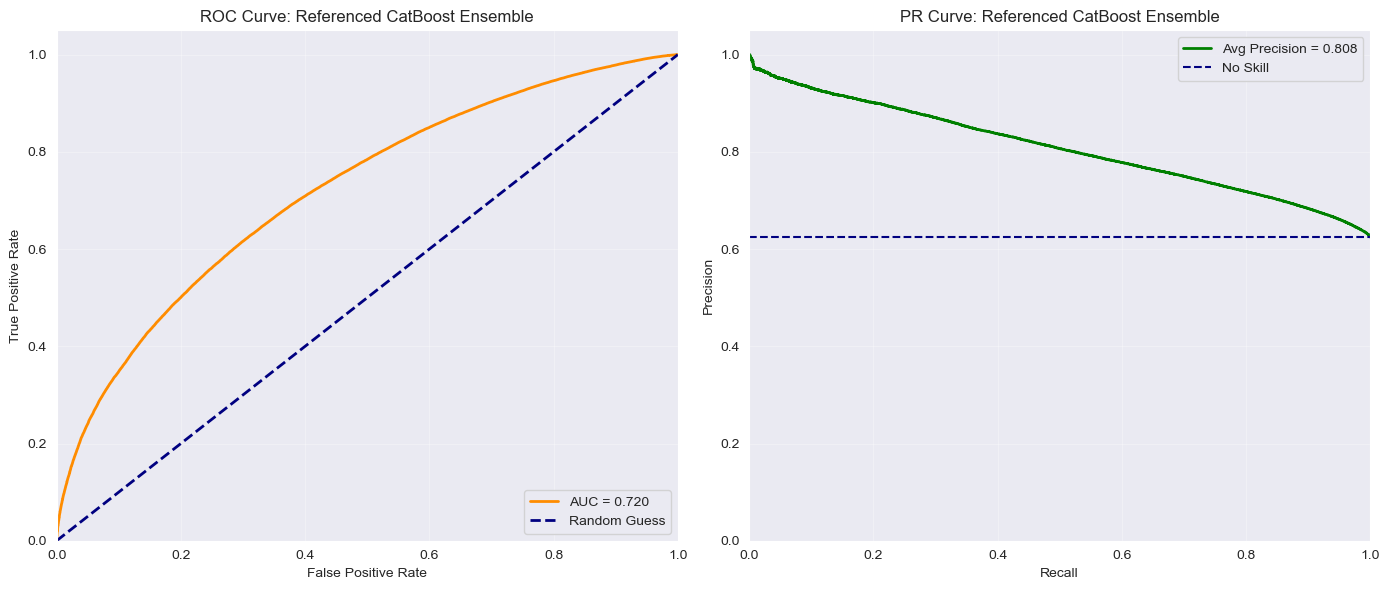

In [23]:
from catboost import Pool

class CatBoostEnsemble:
    def __init__(self, models):
        self.models = models

    def predict_proba(self, X):
        all_preds = np.array([model.predict_proba(X)[:, 1] for model in self.models])
        avg_preds = np.mean(all_preds, axis=0)
        return np.vstack([1 - avg_preds, avg_preds]).T

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)

TARGET = "diagnosed_diabetes"
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

cat_params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "iterations": 5000,
    "learning_rate": 0.04,
    "depth": 9,
    "l2_leaf_reg": 10,
    "random_strength": 1.0,
    "bootstrap_type": "Bayesian",
    "bagging_temperature": 1.2,
    "min_data_in_leaf": 50,
    "od_type": "Iter",
    "od_wait": 100,
    "verbose": 0
}

SEEDS = [42, 52, 62]
N_SPLITS = 5

all_trained_models = []

for seed in SEEDS:
    print(f"\nTraining seed: {seed}")

    skf = StratifiedKFold(
        n_splits=N_SPLITS,
        shuffle=True,
        random_state=seed
    )

    fold_scores = []

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
        val_pool = Pool(X_val, y_val, cat_features=cat_cols)

        model = CatBoostClassifier(
            **cat_params,
            random_seed=seed
        )

        model.fit(
            train_pool,
            eval_set=val_pool,
            use_best_model=True
        )

        all_trained_models.append(model)

        val_pred = model.predict_proba(val_pool)[:, 1]
        auc = roc_auc_score(y_val, val_pred)
        fold_scores.append(auc)
        print(f"Fold {fold+1} AUC: {auc:.4f}")

    print(f"Seed {seed} mean AUC: {np.mean(fold_scores):.5f}")

referenced_ensemble_model = CatBoostEnsemble(all_trained_models)

results.append(
    evaluate_and_graph(referenced_ensemble_model, X_train, y_train, X_test, y_test, "Referenced CatBoost Ensemble", True, True)
)

# Results

In [24]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 11
Valid Models: 7
Disqualified Models: 4

⚠️ The following models were disqualified due to overfitting:


,model,accuracy,auc,train_auc,overfitting_gap
3,XGBoost (Optuna),0.657505,0.698138,0.944471,0.246333
5,LightGBM (Optuna),0.657971,0.716473,0.834118,0.117645
9,Weighted Blender Ensemble,0.660890,0.723654,0.836720,0.113066
10,Referenced CatBoost Ensemble,0.665071,0.720217,0.895172,0.174955


Best by Accuracy:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
7,CatBoost (Tuned),0.655657,0.7251,0.812124,0.681162,0.75029,0.02519,False


Best by AUC:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
7,CatBoost (Tuned),0.655657,0.7251,0.812124,0.681162,0.75029,0.02519,False


Best by Average Precision:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
7,CatBoost (Tuned),0.655657,0.7251,0.812124,0.681162,0.75029,0.02519,False



Final ranking (higher = better):


,model,accuracy,auc,average_precision,overfitting_gap
7,CatBoost (Tuned),0.655657,0.725100,0.812124,0.025190
8,Weighted Stacking Ensemble,0.599829,0.717855,0.802087,0.044739
1,Gradient Boosting (Tuned),0.642224,0.712208,0.802657,0.012077
4,LightGBM,0.641700,0.712076,0.802616,0.007449
2,XGBoost,0.641624,0.711794,0.802234,0.011036
6,CatBoost,0.633586,0.703829,0.797641,0.002022
0,Logistic Regression,0.628548,0.695317,0.791999,0.000744



🏆 Best model: CatBoost (Tuned)


# Submission for Kaggle

Manual Process, must use results to correctly call the best model

In [25]:
testing_scaled_num = scaler.transform(testing[vars_dict["true_numerical_vars"]])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=testing.index
)

testing_dummies = pd.get_dummies(testing[vars_dict["true_categorical_vars"]], drop_first=True)

_, testing_encoded_aligned = X_train_encoded.align(
    testing_dummies,
    join='left',
    axis=1,
    fill_value=0
)

testing_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {testing_scaled_df.shape}")
print(f"Testing shape:  {testing_final.shape}")

Training shape: (300000, 15)
Testing shape:  (300000, 36)


In [32]:
predictions = blender.predict_proba(testing_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'diagnosed_diabetes': predictions
})

submission.to_csv('blended_ensemble_2_gradient_boosting.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


,id,diagnosed_diabetes
0,700000,0.377180
1,700001,0.536708
2,700002,0.668095
3,700003,0.294348
4,700004,0.897139
